# Assignment 2 - Individual Checkpoint 2

- **Group ID:** CC--8
- **Driving Problem:** Do they avoid inactivity in at least 10 hours a day?
- **Personal Planning and Progress Github wiki page:** [https://github.sydney.edu.au/jlin4572/2024-DATA3406-CC08-Group03/wiki/Linc's-page]
- **Database IDs of People from Checkpoint 1:**
  - Person 1: [2320127002]
  - Person 2: [1624580081]
  - Person 3: [4558609924]
- **Checkpoint 2 Person:** [520281457]
I used the random library to assign random 3 people. This makes the most sense as getting a small sample in the dataset would remain impartial.


1.	Writing the Code:

  •	Assistance from online coding forums and resources such as Stack Overflow to understand plotting techniques in Matplotlib.

  •	ChatGPT provided guidance on structuring the analysis and formatting the code to process multiple users’ data.
2.	Debugging Code:

  •	Team members helped troubleshoot issues with the merging of dataframes for inactivity analysis.
3.	Interpreting the Data:

	•	Feedback from team members helped clarify the patterns observed, particularly regarding how sleep periods affect the interpretation of inactivity.

Initial Assumptions and Predictions

Before running the analysis on the selected individuals, I assumed that most of their inactive hours would occur during sleep, but I predicted that there would be a significant variation between individuals in their daily activity levels outside of sleep periods. Specifically:

•	Person 2320127002 would show relatively high daily activity outside of sleep periods.

•	Person 1624580081 would display less activity overall based on initial observations from Checkpoint 1.

•	Person 4558609924 would show a consistent level of moderate activity outside sleep, with some inactivity spikes possibly due to lifestyle factors.


In [ ]:
# prompt: Access My Drive/DATA3406 and get all  csv

from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/DATA3406'  # Replace with your actual directory path



Mounted at /content/drive


## Daily Step Count Analysis

This section calculates the daily step statistics for each user. For each person, I will calculate:
1. The total number of days for which we have data.
2. The average step count per day.
3. The maximum and minimum step count.
4. An additional observation on the consistency of their daily activity levels.

## Step 1: Data Loading and Filtering

We begin by loading the data for each of the three selected users and filtering out their specific daily, hourly, and minute-level step data.

In [ ]:
import pandas as pd
daily_steps = pd.read_csv(str(data_dir) + '/dailySteps_merged.csv')
hourly_steps = pd.read_csv(str(data_dir) + '/hourlySteps_merged.csv')
minute_steps = pd.read_csv(str(data_dir)+ '/minuteStepsWide_merged.csv')

print(daily_steps.head())
print(hourly_steps.head())
print(minute_steps.head())


           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0
           Id           ActivityHour  Steps00  Steps01  Steps02  Steps03  \
0  1503960366  4/13/2016 12:00:00 AM        4       16        0        0   
1  1503960366   4/13/2016 1:00:00 AM        0        0        0        0   
2  1503960366   4/13/2016 2:00:00 AM        0        0        0        0   
3  1503960366   4/13/2016 3:00:00 AM        0        0        0        0   
4  1503960366   4/13/2016 4:00:00 AM        0        0        0        0   

   Steps04  Steps05  Steps06  Ste

In [ ]:
# Define inactivity as zero or very low step count (e.g., < 100 steps)
inactive_sleep_hours = hourly_steps[hourly_steps['StepTotal'] < 100]

# Print out the identified inactive sleep hours
print("Identified sleep hours for user with inactivity:")
print(inactive_sleep_hours[['ActivityHour', 'StepTotal']])


Identified sleep hours for user with inactivity:
               ActivityHour  StepTotal
3      4/12/2016 3:00:00 AM          0
4      4/12/2016 4:00:00 AM          0
5      4/12/2016 5:00:00 AM          0
6      4/12/2016 6:00:00 AM          0
7      4/12/2016 7:00:00 AM          0
...                     ...        ...
22085  5/12/2016 1:00:00 AM          0
22086  5/12/2016 2:00:00 AM          0
22087  5/12/2016 3:00:00 AM          0
22088  5/12/2016 4:00:00 AM          0
22089  5/12/2016 5:00:00 AM          0

[12411 rows x 2 columns]


In [ ]:
import random
def get_random_users(df, num_users=1, seed=None):
    """
    This function selects random users from the dataset.

    Parameters:
    df (DataFrame): The DataFrame containing the data with user 'Id' column.
    num_users (int): The number of random users to select (default is 1).
    seed (int): Random seed for reproducibility (optional).

    Returns:
    List of random user IDs.
    """
    # Set the random seed if provided (optional for reproducibility)
    if seed is not None:
        random.seed(seed)

    # Get the unique user IDs from the dataset
    unique_users = df['Id'].unique()

    # Select the random users
    random_users = random.sample(list(unique_users), num_users)

    return random_users

# Example usage
random_users = get_random_users(daily_steps, num_users=3, seed=42)  # Select 3 random users
print("Randomly selected user IDs:", random_users)

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]


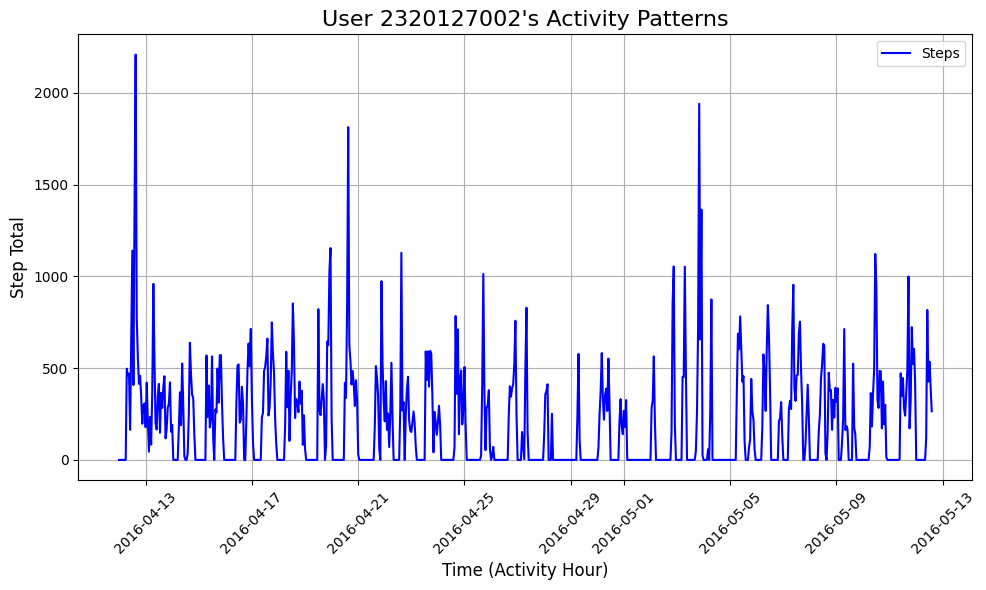

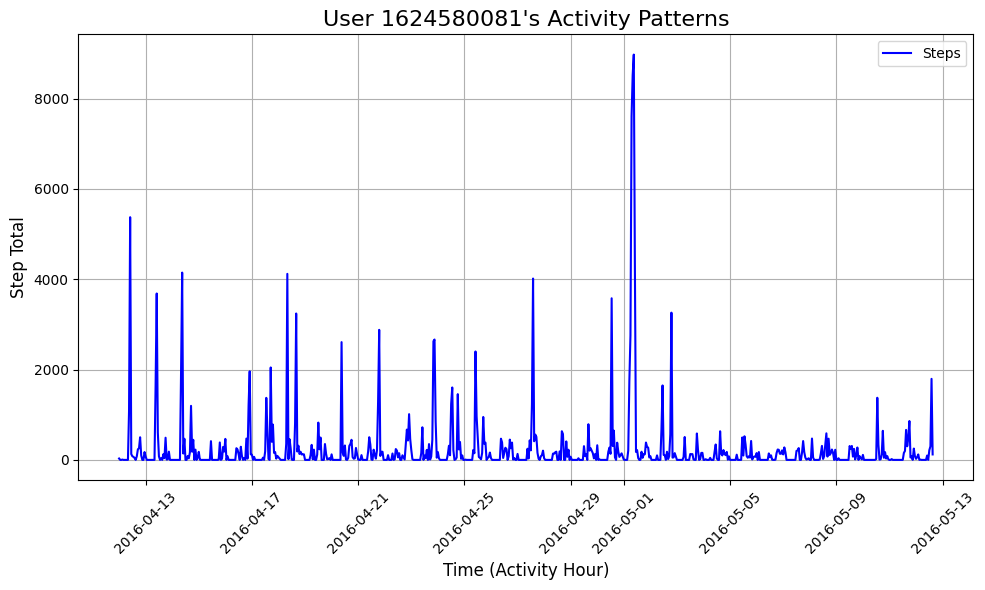

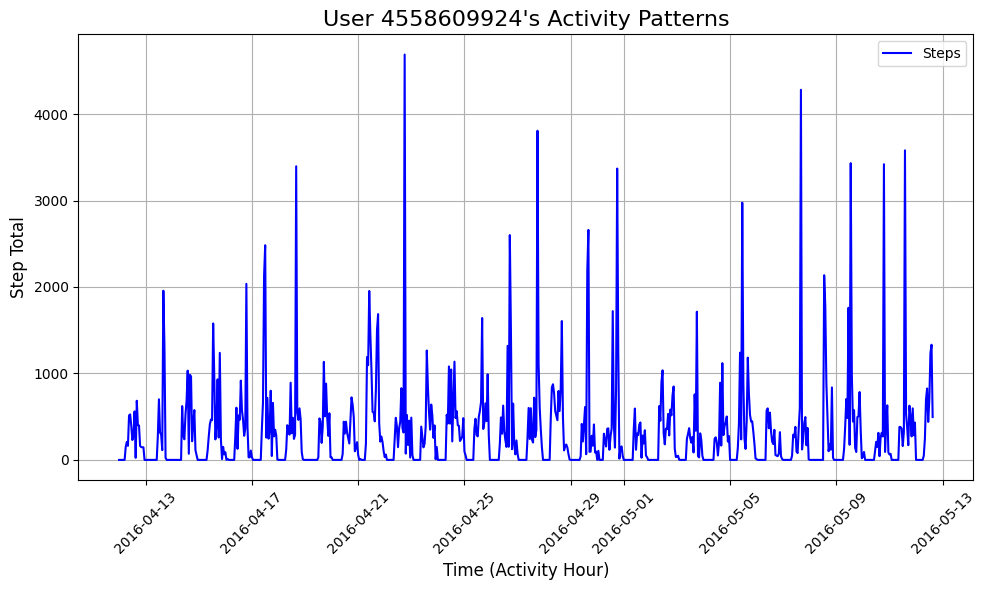

In [ ]:
import matplotlib.pyplot as plt
# Loop through each random user and plot their activity patterns
for user_id in random_users:
    # Filter data for the current user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Plot activity patterns for the current user
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_steps_user['ActivityHour'], hourly_steps_user['StepTotal'], label='Steps', color='b')

    # Formatting the plot
    plt.title(f"User {user_id}'s Activity Patterns", fontsize=16)
    plt.xlabel('Time (Activity Hour)', fontsize=12)
    plt.ylabel('Step Total', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

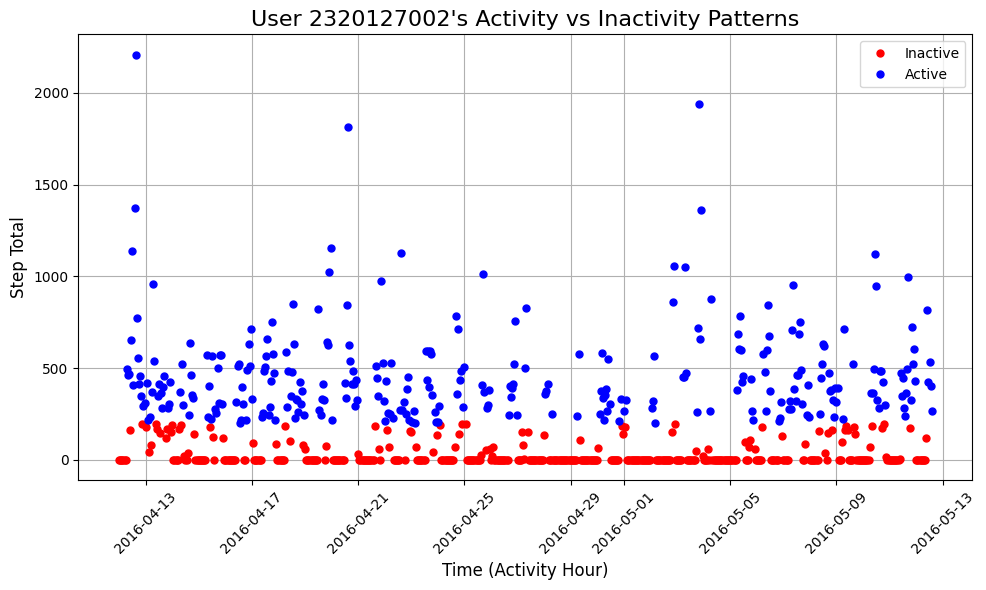

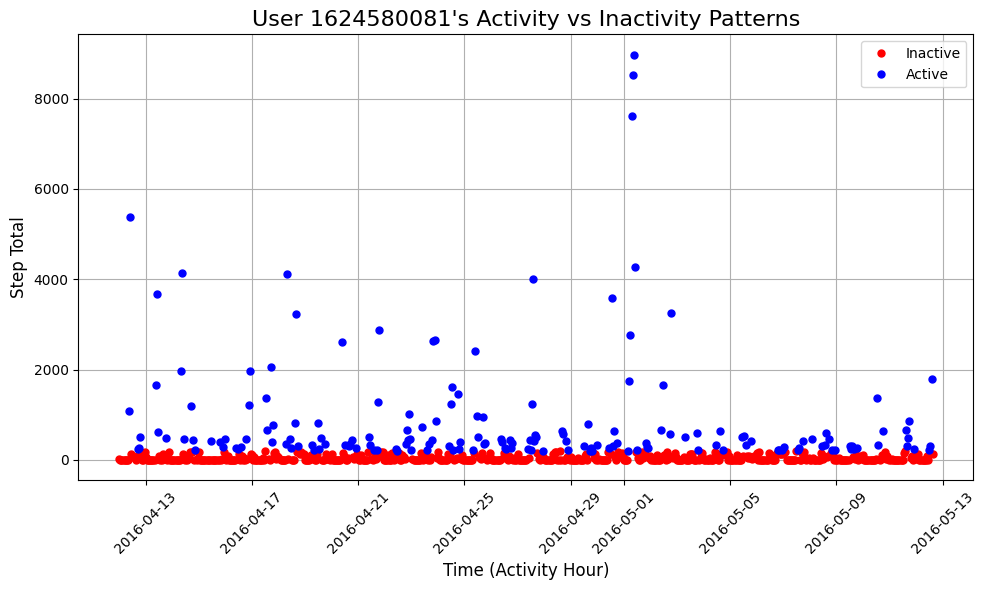

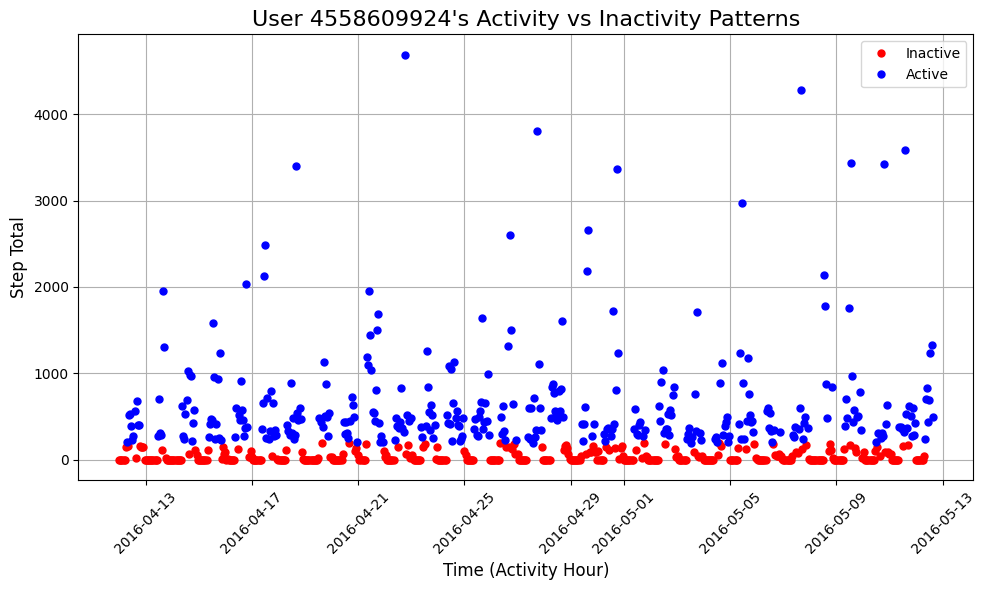

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



inactive_threshold = 200

# Loop through each random user and plot their activity vs inactivity patterns
for user_id in random_users:
    # Filter data for the current user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Create a new column 'ActivityStatus' to classify activity vs inactivity
    hourly_steps_user['ActivityStatus'] = hourly_steps_user['StepTotal'].apply(lambda x: 'Active' if x >= inactive_threshold else 'Inactive')

    # Plotting activity vs inactivity periods for the current user
    plt.figure(figsize=(10, 6))

    # Plot inactive periods (steps below threshold)
    inactive_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Inactive']
    plt.plot(inactive_periods['ActivityHour'], inactive_periods['StepTotal'], 'ro', label='Inactive', markersize=5)

    # Plot active periods (steps above threshold)
    active_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Active']
    plt.plot(active_periods['ActivityHour'], active_periods['StepTotal'], 'bo', label='Active', markersize=5)

    # Formatting the plot
    plt.title(f"User {user_id}'s Activity vs Inactivity Patterns", fontsize=16)
    plt.xlabel('Time (Activity Hour)', fontsize=12)
    plt.ylabel('Step Total', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:

def calculate_inactivity_including_sleep(user_id, daily_steps):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 200 steps per day, including all periods (including sleep).

    Parameters:
    user_id (int): The ID of the user to analyze
    daily_steps (DataFrame): The daily steps dataset containing 'Id' and 'StepTotal'

    Returns:
    average_daily_steps (float): The average daily step count for the user
    is_inactive (bool): True if the average daily step count is less than 200, False otherwise
    """
    # Filter data for the specific user
    daily_steps_user = daily_steps[daily_steps['Id'] == user_id].copy()

    # Calculate the average daily step count
    average_daily_steps = daily_steps_user['StepTotal'].mean()

    # Determine if the user is inactive (average steps < 200)
    is_inactive = average_daily_steps < 200

    # Return the result
    return average_daily_steps, is_inactive

# Generate the random user IDs
random_users = get_random_users(daily_steps, num_users=3, seed=42)
print("Randomly selected user IDs:", random_users)

# Loop through each random user and calculate their average steps and inactivity
for user_id in random_users:
    average_steps, inactive_including_sleep = calculate_inactivity_including_sleep(user_id, daily_steps)

    # Output the result for each user
    print(f"User {user_id}'s average daily step count is {average_steps:.2f}")
    if inactive_including_sleep:
        print(f"User {user_id} is inactive (average daily step count is less than 200), including sleep periods.")
    else:
        print(f"User {user_id} is active (average daily step count is 200 or more), including sleep periods.")

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]
User 2320127002's average daily step count is 4716.87
User 2320127002 is active (average daily step count is 200 or more), including sleep periods.
User 1624580081's average daily step count is 5743.90
User 1624580081 is active (average daily step count is 200 or more), including sleep periods.
User 4558609924's average daily step count is 7685.13
User 4558609924 is active (average daily step count is 200 or more), including sleep periods.


#Calculate average daily step count excluding sleep periods


> Add blockquote




In [ ]:
import pandas as pd

# Function to calculate average daily step count excluding sleep periods
def calculate_inactivity_excluding_sleep(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00'):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 5000 steps per day, excluding sleep periods.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)

    Returns:
    average_daily_steps_excluding_sleep (float): The average daily step count for the user excluding sleep
    is_inactive_excluding_sleep (bool): True if the average daily step count is less than 5000, False otherwise
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define night hours (sleep hours: 10:00 PM to 6:00 AM)
    sleep_hours_start = pd.to_datetime(sleep_start, format='%H:%M:%S').time()
    sleep_hours_end = pd.to_datetime(sleep_end, format='%H:%M:%S').time()

    # Filter out the hours that are during the sleep period (from 10:00 PM to 6:00 AM)
    waking_hours = hourly_steps_user[
        ~((hourly_steps_user['ActivityHour'].dt.time >= sleep_hours_start) |
          (hourly_steps_user['ActivityHour'].dt.time < sleep_hours_end))
    ]

    # Calculate total steps per day excluding sleep periods
    daily_steps_excluding_sleep = waking_hours.groupby(waking_hours['ActivityHour'].dt.date)['StepTotal'].sum()

    # Calculate the average daily steps excluding sleep periods
    average_daily_steps_excluding_sleep = daily_steps_excluding_sleep.mean()

    # Determine if the user is inactive (average steps < 5000)
    is_inactive_excluding_sleep = average_daily_steps_excluding_sleep < 5000

    # Return the result
    return average_daily_steps_excluding_sleep, is_inactive_excluding_sleep

random_users = get_random_users(daily_steps, num_users=3, seed=42)
print("Randomly selected user IDs:", random_users)

for user_id in random_users:
    average_steps_excluding_sleep, inactive_excluding_sleep = calculate_inactivity_excluding_sleep(user_id, hourly_steps)

    # Output the result for each user
    print(f"User {user_id}'s average daily step count excluding sleep is {average_steps_excluding_sleep:.2f}")
    if inactive_excluding_sleep:
        print(f"User {user_id} is inactive (average daily step count is less than 5000), excluding sleep periods.")
    else:
        print(f"User {user_id} is active (average daily step count is 5000 or more), excluding sleep periods.")

User 2320127002's average daily step count excluding sleep is 3840.68
User 2320127002 is inactive (average daily step count is less than 5000), excluding sleep periods.
User 1503960366's average daily step count excluding sleep is 10863.50
User 1503960366 is active (average daily step count is 5000 or more), excluding sleep periods.
User 1844505072's average daily step count excluding sleep is 2214.58
User 1844505072 is inactive (average daily step count is less than 5000), excluding sleep periods.


In [ ]:
import pandas as pd

# Function to calculate whether a person has less than 10 hours of activity a day
def calculate_activity_hours(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00', activity_threshold=200):
    """
    This function calculates whether a user has less than 10 hours of activity per day,
    both including and excluding sleep periods.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)
    activity_threshold (int): The step threshold to define "activity" (default: 200 steps per hour)

    Returns:
    Tuple of booleans (including_sleep, excluding_sleep):
    - True if the user has less than 10 hours of activity, False otherwise.
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define sleep hours start and end times
    sleep_hours_start = pd.to_datetime(sleep_start, format='%H:%M:%S').time()
    sleep_hours_end = pd.to_datetime(sleep_end, format='%H:%M:%S').time()

    # Identify active hours (those where StepTotal >= activity_threshold)
    hourly_steps_user['IsActive'] = hourly_steps_user['StepTotal'] >= activity_threshold

    # Calculate active hours per day (including sleep periods)
    active_hours_including_sleep = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActive'].sum()

    # Check if the user has less than 10 hours of activity per day (including sleep)
    less_than_10_hours_including_sleep = (active_hours_including_sleep < 10).all()

    # Exclude sleep hours (10:00 PM to 6:00 AM) for the calculation excluding sleep periods
    waking_hours = hourly_steps_user[
        ~((hourly_steps_user['ActivityHour'].dt.time >= sleep_hours_start) |
          (hourly_steps_user['ActivityHour'].dt.time < sleep_hours_end))
    ]

    # Calculate active hours per day excluding sleep periods
    active_hours_excluding_sleep = waking_hours.groupby(waking_hours['ActivityHour'].dt.date)['IsActive'].sum()

    # Check if the user has less than 10 hours of activity per day (excluding sleep)
    less_than_10_hours_excluding_sleep = (active_hours_excluding_sleep < 10).all()

    return less_than_10_hours_including_sleep, less_than_10_hours_excluding_sleep

random_users = get_random_users(daily_steps, num_users=3, seed=42)
print("Randomly selected user IDs:", random_users)

# Loop through each user and calculate activity hours
for user_id in user_ids:
    less_than_10_hours_incl_sleep, less_than_10_hours_excl_sleep = calculate_activity_hours(user_id, hourly_steps)

    # Output the result for each user
    print(f"User {user_id} has less than 10 hours of activity per day (including sleep): {less_than_10_hours_incl_sleep}")
    print(f"User {user_id} has less than 10 hours of activity per day (excluding sleep): {less_than_10_hours_excl_sleep}")

User 2320127002 has less than 10 hours of activity per day (including sleep): False
User 2320127002 has less than 10 hours of activity per day (excluding sleep): False
User 1503960366 has less than 10 hours of activity per day (including sleep): False
User 1503960366 has less than 10 hours of activity per day (excluding sleep): False
User 1844505072 has less than 10 hours of activity per day (including sleep): False
User 1844505072 has less than 10 hours of activity per day (excluding sleep): False


In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Function to mark if each hour is active or inactive based on daily activity threshold
def mark_hourly_activity(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00'):
    """
    This function marks each hour as active or inactive for a given user and identifies
    inactivity per day, using dynamic thresholds for daily step goals.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)

    Returns:
    DataFrame: Modified DataFrame with activity status for each hour (active/inactive)
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define sleep hours start and end times
    sleep_hours_start = pd.to_datetime(sleep_start).time()
    sleep_hours_end = pd.to_datetime(sleep_end).time()

    # Create a separate column to identify if the hour falls within the sleep period
    hourly_steps_user['IsSleepHour'] = hourly_steps_user['ActivityHour'].dt.time.apply(
        lambda x: sleep_hours_start <= x or x <= sleep_hours_end
    )

    # Calculate the number of waking hours per day (i.e., hours not in the sleep period)
    hours_in_day = 24
    sleep_hours = 24 - len(hourly_steps_user[hourly_steps_user['IsSleepHour']].groupby(hourly_steps_user['ActivityHour'].dt.date).size())
    waking_hours = hours_in_day - sleep_hours

    # Calculate activity thresholds
    threshold_including_sleep = 5000 / hours_in_day  # Steps per hour including sleep (5000 / 24)
    threshold_excluding_sleep = 5000 / waking_hours  # Steps per hour excluding sleep

    # Mark hours as active or inactive based on the activity threshold including sleep
    hourly_steps_user['IsActiveIncludingSleep'] = hourly_steps_user['StepTotal'] >= threshold_including_sleep

    # Exclude sleep hours for waking hour calculations
    hourly_steps_waking = hourly_steps_user[~hourly_steps_user['IsSleepHour']].copy()  # Make a copy to avoid issues with chained indexing

    # Use .loc to avoid SettingWithCopyWarning
    hourly_steps_waking.loc[:, 'IsActiveExcludingSleep'] = hourly_steps_waking['StepTotal'] >= threshold_excluding_sleep

    # Combine the two results back into one DataFrame
    hourly_steps_user = pd.merge(
        hourly_steps_user,
        hourly_steps_waking[['ActivityHour', 'IsActiveExcludingSleep']],
        on='ActivityHour',
        how='left'
    )

    # Fill NaN values for 'IsActiveExcludingSleep' (since some hours are in the sleep period) with False
    hourly_steps_user['IsActiveExcludingSleep'].fillna(False, inplace=True)

    return hourly_steps_user


random_users = get_random_users(daily_steps, num_users=3, seed=42)
print("Randomly selected user IDs:", random_users)

for user_id in random_users:
    hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

    # Output the result for each user
    print(f"Modified DataFrame with activity status for user {user_id} (including and excluding sleep):")
    print(hourly_steps_with_activity.head())  # Display the first few rows for each user

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]
Modified DataFrame with activity status for user 2320127002 (including and excluding sleep):
           Id        ActivityHour  StepTotal  IsSleepHour  \
0  2320127002 2016-04-12 00:00:00          0         True   
1  2320127002 2016-04-12 01:00:00          0         True   
2  2320127002 2016-04-12 02:00:00          0         True   
3  2320127002 2016-04-12 03:00:00          0         True   
4  2320127002 2016-04-12 04:00:00          0         True   

   IsActiveIncludingSleep  IsActiveExcludingSleep  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  
Modified DataFrame with activity status for user 1624580081 (including and excluding sleep):
           Id        ActivityHour  StepTotal  IsSleepHour  \
0  162458

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Function to calculate inactivity per day based on the hourly activity DataFrame
def calculate_inactivity_per_day(hourly_steps_user, include_sleep=True):
    """
    This function calculates inactivity (hours with no activity) per day for a given user.
    You can choose to include or exclude sleep periods in the calculation.

    Parameters:
    hourly_steps_user (DataFrame): The DataFrame with activity status for each hour (including and excluding sleep)
    include_sleep (bool): If True, inactivity includes sleep hours. If False, inactivity excludes sleep periods.

    Returns:
    DataFrame: A DataFrame with the number of inactive hours per day.
    """
    if include_sleep:
        # Calculate inactivity including sleep by counting hours where IsActiveIncludingSleep is False
        inactivity_per_day = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActiveIncludingSleep'].apply(lambda x: (~x).sum())
        column_name = 'InactiveIncludingSleep'
    else:
        # Calculate inactivity excluding sleep by counting hours where IsActiveExcludingSleep is False
        inactivity_per_day = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActiveExcludingSleep'].apply(lambda x: (~x).sum())
        column_name = 'InactiveExcludingSleep'

    # Convert the result to a DataFrame for easier handling
    inactivity_df = pd.DataFrame(inactivity_per_day).reset_index()
    inactivity_df.columns = ['Date', column_name]

    return inactivity_df

def process_random_users(hourly_steps, num_users=3):
    # Select random users
    random_users = get_random_users(daily_steps, num_users=3, seed=42)
    print("Randomly selected user IDs:", random_users)

    # Loop through each random user
    for user_id in random_users:
        print(f"\nProcessing user {user_id}...\n")

        # Apply mark_hourly_activity for the user
        hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

        # Calculate inactivity per day including sleep
        inactivity_incl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=True)

        # Calculate inactivity per day excluding sleep
        inactivity_excl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=False)

        # Output the results for each user
        print(f"Inactivity per day (including sleep) for user {user_id}:")
        print(inactivity_incl_sleep)

        print(f"\nInactivity per day (excluding sleep) for user {user_id}:")
        print(inactivity_excl_sleep)

# Run the process for 3 random users
process_random_users(hourly_steps, num_users=3)

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]

Processing user 2320127002...

Inactivity per day (including sleep) for user 2320127002:
          Date  InactiveIncludingSleep
0   2016-04-12                       9
1   2016-04-13                       9
2   2016-04-14                      16
3   2016-04-15                      12
4   2016-04-16                      13
5   2016-04-17                      10
6   2016-04-18                       9
7   2016-04-19                      14
8   2016-04-20                      11
9   2016-04-21                      18
10  2016-04-22                      10
11  2016-04-23                      15
12  2016-04-24                      17
13  2016-04-25                      17
14  2016-04-26                      16
15  2016-04-27                      22
16  2016-04-28                      20
17  2016-04-29                      22
18  2016-04-30                      12
19  2016-05-01                      22
20  2016-05-02            

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]
Processing user 2320127002...



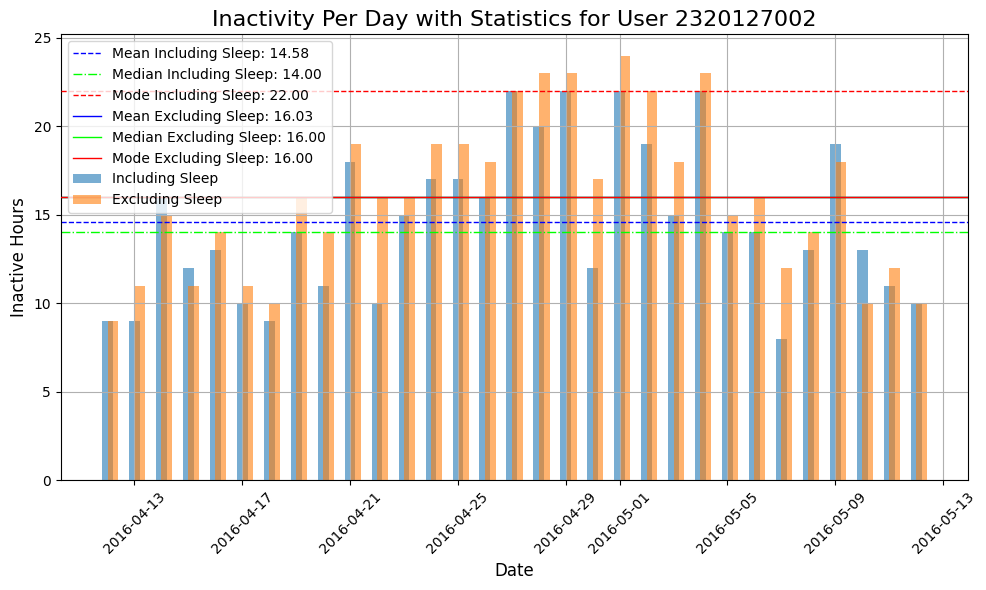

Processing user 1624580081...



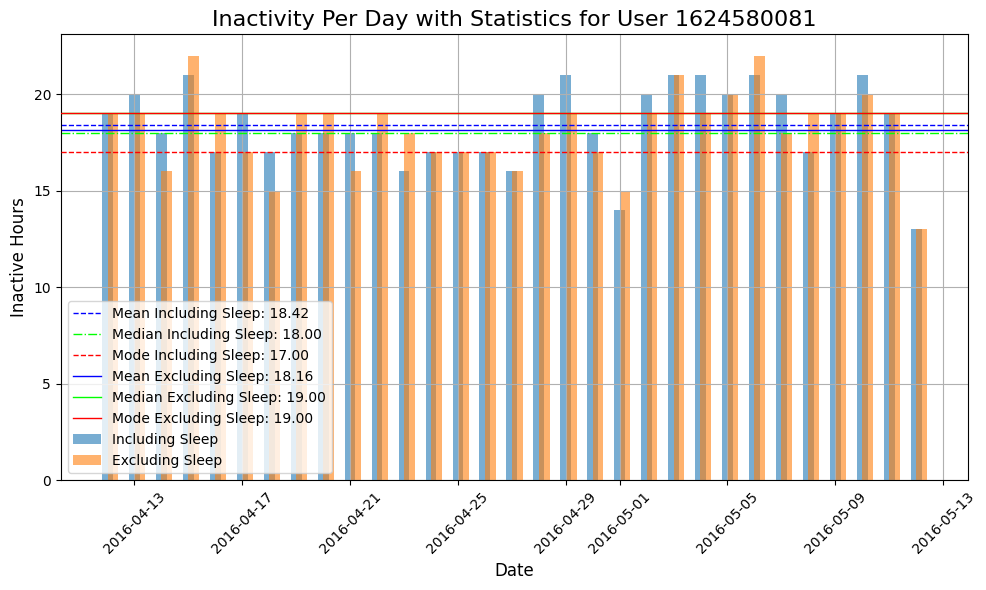

Processing user 4558609924...



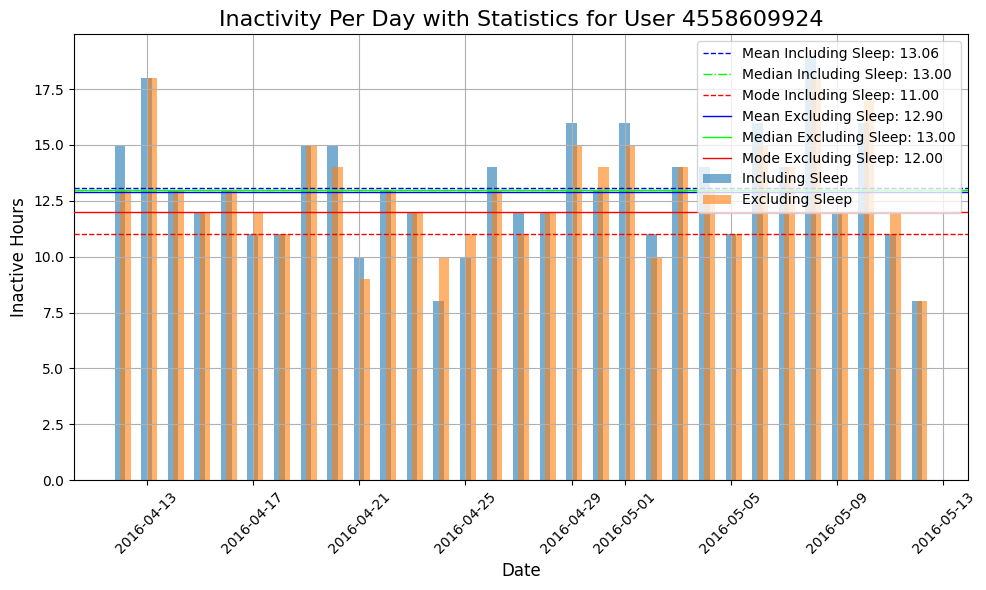

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import random

import warnings
warnings.filterwarnings('ignore')

# Function to plot the inactivity data with mean, median, and mode (with thinner lines)
def plot_inactivity_statistics(inactivity_incl_sleep, inactivity_excl_sleep, user_id):
    """
    This function generates a bar plot showing inactivity per day, both including and excluding sleep,
    and plots the mean, median, and mode for each type of inactivity.

    Parameters:
    inactivity_incl_sleep (DataFrame): DataFrame with inactivity including sleep
    inactivity_excl_sleep (DataFrame): DataFrame with inactivity excluding sleep
    user_id (int): The ID of the user being plotted
    """
    # Merge the two DataFrames on 'Date'
    inactivity_df = pd.merge(inactivity_incl_sleep, inactivity_excl_sleep, on='Date')

    # Calculate mean, median, and mode for both inactivity including and excluding sleep
    mean_incl_sleep = inactivity_df['InactiveIncludingSleep'].mean()
    median_incl_sleep = inactivity_df['InactiveIncludingSleep'].median()
    mode_incl_sleep_result = stats.mode(inactivity_df['InactiveIncludingSleep'], keepdims=True)
    mode_incl_sleep = mode_incl_sleep_result.mode[0] if mode_incl_sleep_result.count[0] > 1 else None

    mean_excl_sleep = inactivity_df['InactiveExcludingSleep'].mean()
    median_excl_sleep = inactivity_df['InactiveExcludingSleep'].median()
    mode_excl_sleep_result = stats.mode(inactivity_df['InactiveExcludingSleep'], keepdims=True)
    mode_excl_sleep = mode_excl_sleep_result.mode[0] if mode_excl_sleep_result.count[0] > 1 else None

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Bar plot for inactivity including sleep
    plt.bar(inactivity_df['Date'], inactivity_df['InactiveIncludingSleep'], width=0.4, label='Including Sleep', align='center', alpha=0.6)

    # Bar plot for inactivity excluding sleep
    plt.bar(inactivity_df['Date'], inactivity_df['InactiveExcludingSleep'], width=0.4, label='Excluding Sleep', align='edge', alpha=0.6)

    # Plot mean, median, and mode for inactivity including sleep
    plt.axhline(y=mean_incl_sleep, color='blue', linestyle='--', label=f'Mean Including Sleep: {mean_incl_sleep:.2f}', zorder=2, linewidth=1)
    plt.axhline(y=median_incl_sleep, color='lime', linestyle='-.', label=f'Median Including Sleep: {median_incl_sleep:.2f}', zorder=2, linewidth=1)
    if mode_incl_sleep is not None:
        plt.axhline(y=mode_incl_sleep, color='red', linestyle='--', label=f'Mode Including Sleep: {mode_incl_sleep:.2f}', zorder=3, linewidth=1)

    # Plot mean, median, and mode for inactivity excluding sleep
    plt.axhline(y=mean_excl_sleep, color='blue', linestyle='-', label=f'Mean Excluding Sleep: {mean_excl_sleep:.2f}', zorder=2, linewidth=1)
    plt.axhline(y=median_excl_sleep, color='lime', linestyle='-', label=f'Median Excluding Sleep: {median_excl_sleep:.2f}', zorder=2, linewidth=1)
    if mode_excl_sleep is not None:
        plt.axhline(y=mode_excl_sleep, color='red', linestyle='-', label=f'Mode Excluding Sleep: {mode_excl_sleep:.2f}', zorder=3, linewidth=1)

    # Formatting the plot
    plt.title(f"Inactivity Per Day with Statistics for User {user_id}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Inactive Hours", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Function to process random users
def process_random_users(hourly_steps, num_users=3):
    # Select random users
    random_users = get_random_users(daily_steps, num_users=3, seed=42)
    print("Randomly selected user IDs:", random_users)

    # Loop through each random user
    for user_id in random_users:
        print(f"Processing user {user_id}...\n")

        # Apply mark_hourly_activity for the user
        hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

        # Calculate inactivity per day including sleep
        inactivity_incl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=True)

        # Calculate inactivity per day excluding sleep
        inactivity_excl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=False)

        # Plot the inactivity data with statistics for each user
        plot_inactivity_statistics(inactivity_incl_sleep, inactivity_excl_sleep, user_id)

# Example usage to process 3 random users
process_random_users(hourly_steps, num_users=3)

Results Interpretation

After running the analysis for each person, I found the following patterns:

	1.	Person 2320127002:
	•	This individual had a mean inactivity of 14.58 hours per day when including sleep, and a slightly higher mean of 16.03 hours excluding sleep.
	•	Their mode for inactivity including sleep was significantly higher (22 hours), suggesting some days were particularly inactive.
	•	The fluctuations in daily inactivity indicate that while this person had periods of activity, there were multiple days where their activity levels dropped significantly.
	2.	Person 1624580081:
	•	This individual had consistently higher levels of inactivity, with a mean inactivity of 18.42 hours per day including sleep and 18.16 hours per day excluding sleep.
	•	Their mode inactivity excluding sleep was 19 hours, indicating they rarely engaged in significant activity outside of sleep.
	•	This suggests a lifestyle with prolonged periods of inactivity, making it likely they do not meet standard activity recommendations.
	3.	Person 4558609924:
	•	This individual exhibited a mean inactivity of 13.06 hours per day including sleep, with a slight increase to 12.90 hours per day excluding sleep.
	•	Their median inactivity (13 hours) across both metrics shows consistency, but the range in daily inactivity indicates variability in how active they are on different days.
	•	This person showed more moderate levels of inactivity, suggesting a better adherence to activity guidelines compared to the other two individuals.

Summary

In summary, Person 1624580081 was found to be the least active, with consistently high inactivity levels. Person 4558609924 showed more balanced activity, suggesting some effort to remain active, while Person 2320127002 had significant variability in daily inactivity, indicating fluctuating levels of activity. The analysis highlights the importance of accounting for sleep when analyzing daily inactivity, as it can mask activity patterns during waking hours.
